## 决策树    
### 优点：计算复杂度不高，输出结果易于理解，对中间值的缺失不敏感，可以处理不相关特征数据。
### 缺点：可能产生过度匹配的问题。
### 适用数据类型：数值型和标称型。
（本算法使用ID3算法划分数据集，该算法处理如何划分数据集，何时停止划分数据集。）

### 3.1.1 信息增益
划分数据集的大原则是：将无序的数据变得更加有序。
集合信息的度量方式称为熵。

下面在python代码中计算信息熵，代码3-1.

In [14]:
import trees
reload(trees)

hello


<module 'trees' from 'trees.py'>

In [19]:
myDat,labels = trees.createDataSet()
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [25]:
reload(trees)
trees.calcShannonEnt(myDat)

0.9709505944546686

熵越高，则混合的数据也越多，在数据集中添加更多的分类，观察熵的变化：

In [27]:
myDat[0][-1] = 'maybe'
myDat

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [28]:
trees.calcShannonEnt(myDat)

1.3709505944546687

#### 得到熵之后，我们就可以按照获取最大信息增益的方法划分数据集

### 3.1.2 划分数据集
分类算法除了需要测量信息熵，还需要划分数据集，度量化分数据集的熵，以便判断当前是否正确划分了数据集。

我们将对每个特征划分数据集的结果计算一次信息熵，然后判断哪个特征划分数据集是最好的方式。

在trees.py中添加代码3-2：按照给定特征划分数据集

In [31]:
reload(trees)
myDat,labels = trees.createDataSet()
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [32]:
trees.splitDataSet(myDat,0,1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [33]:
trees.splitDataSet(myDat,0,0)

[[1, 'no'], [1, 'no']]

接下来我们将遍历整个数据集，循环计算熵和splitDataSet()函数，找到最好的划分方式。

添加代码3-3

In [3]:
import trees
myDat,labels = trees.createDataSet()

In [6]:
reload(trees)
trees.chooseBestFeatureToSplit(myDat)

0

In [7]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

### 3.1.3 递归构建决策树

递归结束的条件是：程序遍历完所有划分数据集的属性，或者每个分支下的所有实例都具有相同的分类。如果所有实例就有相同的分类，则得到一个叶子节点或者终止块。任何到达子节点的数据必然属于叶子节点的分类。

先在trees.py中添加多数表决的方法，代码3-4

创建树的函数代码：代码3-5

In [10]:
reload(trees)

<module 'trees' from 'trees.pyc'>

In [63]:
myDat,labels = trees.createDataSet()

In [64]:
reload(trees)
myTree = trees.createTree(myDat,labels)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}



### 3.2 在python中使用matplotlib注解绘制树形图

使用Matplotlib的注解功能绘制树形图，它可以对文字着色并提供多种形状以供选择，而且我们还可以反转剪头，将它指向文本框而不是数据点。

创建名为treePlotter.py的新文件。

使用文本注解绘制树节点：代码3-6

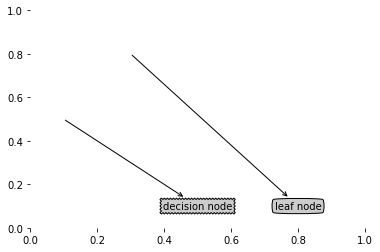

In [43]:
import treePlotter
reload(treePlotter)
treePlotter.createPlot()#测试版

为了绘制一棵完整的树，我们需要知道树有多少层。

这里我们定义两个新函数getNumLeafs()和getTreeDepth(),来获取节点的数目和树的层数。

获取叶节点的数目和树的层数： 代码3-7

编辑plotTree函数，并更新createPlot函数：代码3-8


### 3.3 示例：使用决策树预测隐形眼睛类型

使用python命令加载数据

In [48]:
reload(treePlotter)

<module 'treePlotter' from 'treePlotter.pyc'>

In [80]:
fr = open('lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age','prescript','astigmatic','tearRate']
lensesTree = trees.createTree(lenses,lensesLabels)
lensesTree

{'age': {'pre': {'prescript': {'hyper': {'astigmatic': {'no': {'tearRate': {'normal': 'soft',
        'reduced': 'no lenses'}},
      'yes': 'no lenses'}},
    'myope': {'astigmatic': {'no': {'tearRate': {'normal': 'soft',
        'reduced': 'no lenses'}},
      'yes': {'tearRate': {'normal': 'hard', 'reduced': 'no lenses'}}}}}},
  'presbyopic': {'prescript': {'hyper': {'astigmatic': {'no': {'tearRate': {'normal': 'soft',
        'reduced': 'no lenses'}},
      'yes': 'no lenses'}},
    'myope': {'astigmatic': {'no': 'no lenses',
      'yes': {'tearRate': {'normal': 'hard', 'reduced': 'no lenses'}}}}}},
  'young': {'tearRate': {'hard': 'hard',
    'no lenses': 'no lenses',
    'soft': 'soft'}}}}

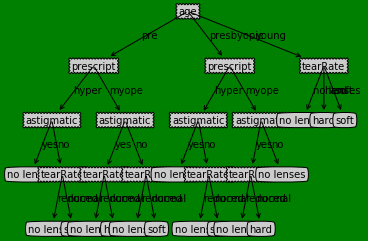

In [89]:
reload(treePlotter)
treePlotter.createPlot(lensesTree)

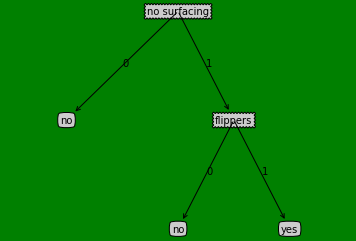

In [90]:
myDat,labels = trees.createDataSet()
myTree = trees.createTree(myDat,labels)
treePlotter.createPlot(myTree)